In [1]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np

# Hyper parameters
batch_size = 128
nb_epoch = 10

encoding_dim = 784
decoding_dim = 784
nb_hidden = 32



Using TensorFlow backend.


In [2]:
# Load MNIST Dataset
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(60000, encoding_dim)
X_test = X_test.reshape(10000, encoding_dim)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
# Build autoencoder model
input_vec = Input(shape=(encoding_dim,))
encoded = Dense(activation='relu', units=nb_hidden)(input_vec)
decoded = Dense(decoding_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_vec, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Train
autoencoder.fit(X_train, X_train,
                epochs=nb_epoch, batch_size=batch_size, shuffle=True, verbose=1,
                validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 34us/step - loss: 0.2418 - val_loss: 0.1695
Epoch 2/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.1513 - val_loss: 0.1373
Epoch 3/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.1284 - val_loss: 0.1207
Epoch 4/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.1150 - val_loss: 0.1105
Epoch 5/10
48000/48000 [==============================] - 1s 31us/step - loss: 0.1067 - val_loss: 0.1041
Epoch 6/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.1015 - val_loss: 0.1002
Epoch 7/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.0983 - val_loss: 0.0980
Epoch 8/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.0964 - val_loss: 0.0963
Epoch 9/10
48000/48000 [==============================] - 1s 31us/step - loss: 0.0953 - val_loss: 0.0957
Epoch

In [5]:
# Evaluate
evaluation = autoencoder.evaluate(X_test, X_test, batch_size=batch_size, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f' % (evaluation))

10000/10000 [==============================] - 0s 14us/step

Summary: Loss over the test dataset: 0.09


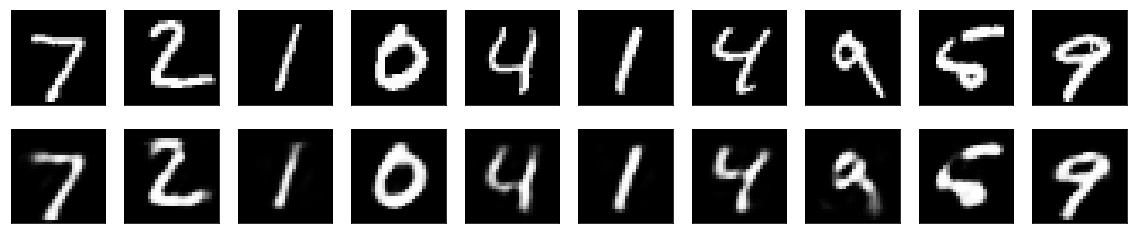

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images 
decoded_vec = autoencoder.predict(X_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_vec[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()